In [1]:
import numpy as np

In [2]:
from scipy.io import loadmat

In [3]:
import matplotlib 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

In [4]:
data_path = '/Users/linggeli/neuroscience/data/SuperChris/super_chris_extraction_odor2s.mat'
data_odor = loadmat(data_path)

In [10]:
trial_info = data_odor['trialInfo']
select_odor_B = (trial_info[:, 0] == 1) & (trial_info[:, 1] == 1) & (trial_info[:, 3] == 2)
select_odor_C = (trial_info[:, 0] == 1) & (trial_info[:, 1] == 1) & (trial_info[:, 3] == 3)
lfp_odor_B = data_odor['lfpEpoch'][select_odor_B, 2000:3000, :]
lfp_odor_C = data_odor['lfpEpoch'][select_odor_C, 2000:3000, :]

In [13]:
print(data_odor['unitIDs'])  # T13, T23, T15, T22, T14, T19 have the most units

[[array([u'T1-U1'], dtype='<U5') array([u'T1-U2'], dtype='<U5')
  array([u'T1-U3'], dtype='<U5') array([u'T12-U1'], dtype='<U6')
  array([u'T13-U1'], dtype='<U6') array([u'T13-U2'], dtype='<U6')
  array([u'T13-U3'], dtype='<U6') array([u'T13-U4'], dtype='<U6')
  array([u'T13-U5'], dtype='<U6') array([u'T13-U6'], dtype='<U6')
  array([u'T13-U7'], dtype='<U6') array([u'T13-U8'], dtype='<U6')
  array([u'T14-U1'], dtype='<U6') array([u'T14-U2'], dtype='<U6')
  array([u'T14-U3'], dtype='<U6') array([u'T14-U4'], dtype='<U6')
  array([u'T15-U1'], dtype='<U6') array([u'T15-U2'], dtype='<U6')
  array([u'T15-U3'], dtype='<U6') array([u'T15-U4'], dtype='<U6')
  array([u'T15-U5'], dtype='<U6') array([u'T15-U6'], dtype='<U6')
  array([u'T16-U1'], dtype='<U6') array([u'T19-U1'], dtype='<U6')
  array([u'T19-U2'], dtype='<U6') array([u'T19-U3'], dtype='<U6')
  array([u'T19-U4'], dtype='<U6') array([u'T2-U1'], dtype='<U5')
  array([u'T2-U2'], dtype='<U5') array([u'T2-U3'], dtype='<U5')
  array([u'T21-U

In [11]:
lfp_odor_B = lfp_odor_B[:, :, [3, 13, 5, 12, 4, 8]]
lfp_odor_C = lfp_odor_C[:, :, [3, 13, 5, 12, 4, 8]]
print(lfp_odor_B.shape)
print(lfp_odor_C.shape)

(41, 1000, 6)
(37, 1000, 6)


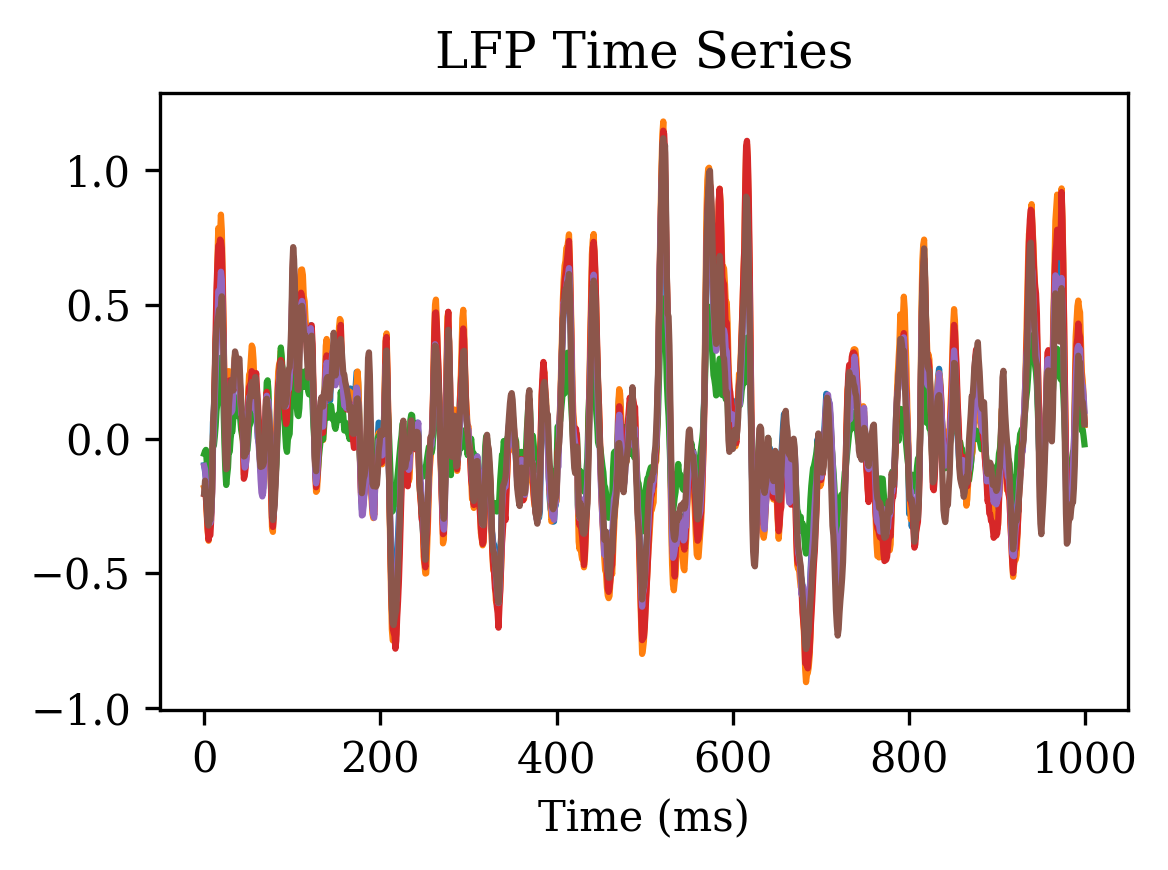

In [69]:
fig = plt.figure(figsize=(4, 3), dpi=300)
for j in range(6):
    plt.plot(lfp_odor_B[0, :, j])
plt.title('LFP Time Series')
plt.xlabel('Time (ms)')
fig.tight_layout()
fig.savefig('lfp_time_series.png')
plt.show()

In [19]:
import pickle

In [20]:
with open('/Users/linggeli/gp_connectivity/superchris_final.pickle', 'rb') as fp:
    results = pickle.load(fp)

In [21]:
F_sample, loading_sample, variance_sample, theta_sample, traces_hist, mse_history = results

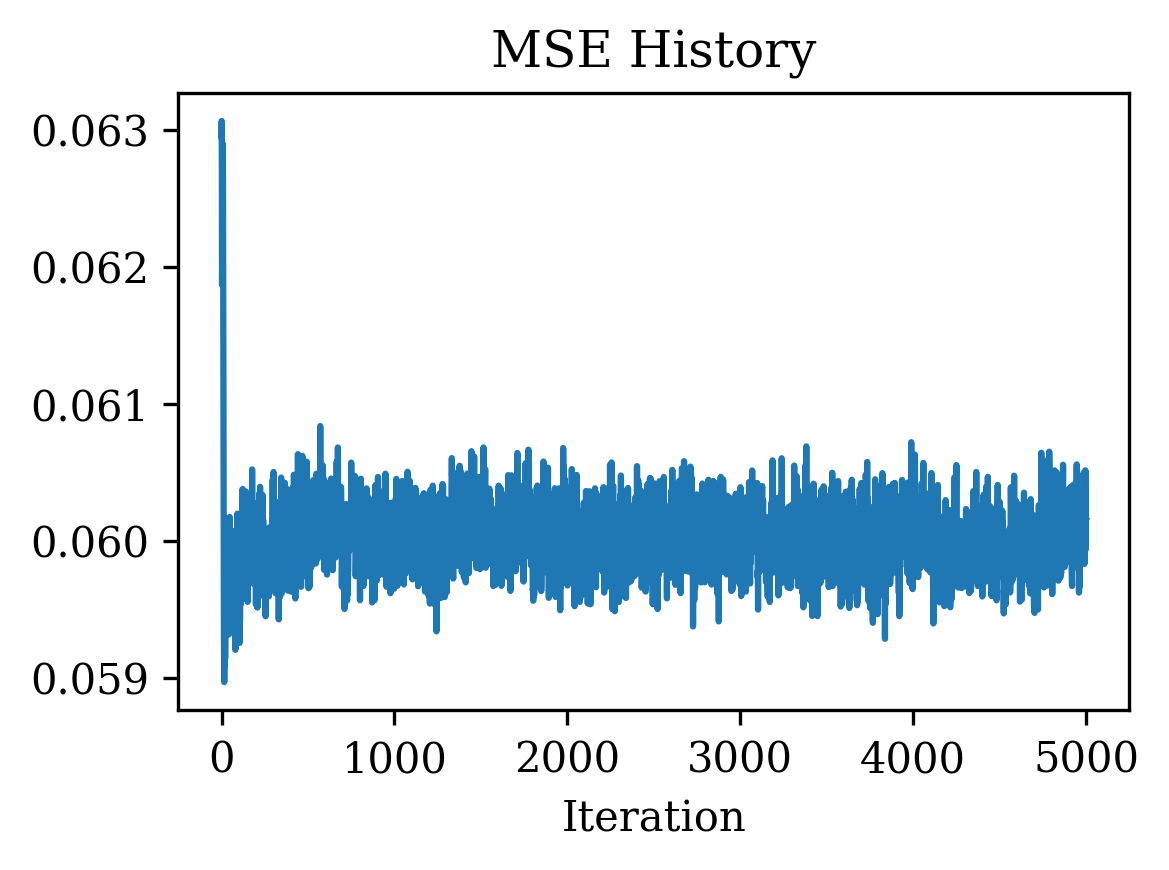

In [32]:
fig = plt.figure(figsize=(4, 3), dpi=300)
plt.plot(mse_history)
plt.title('MSE History')
plt.xlabel('Iteration')
fig.tight_layout()
fig.savefig('mse_history.png')
plt.show()

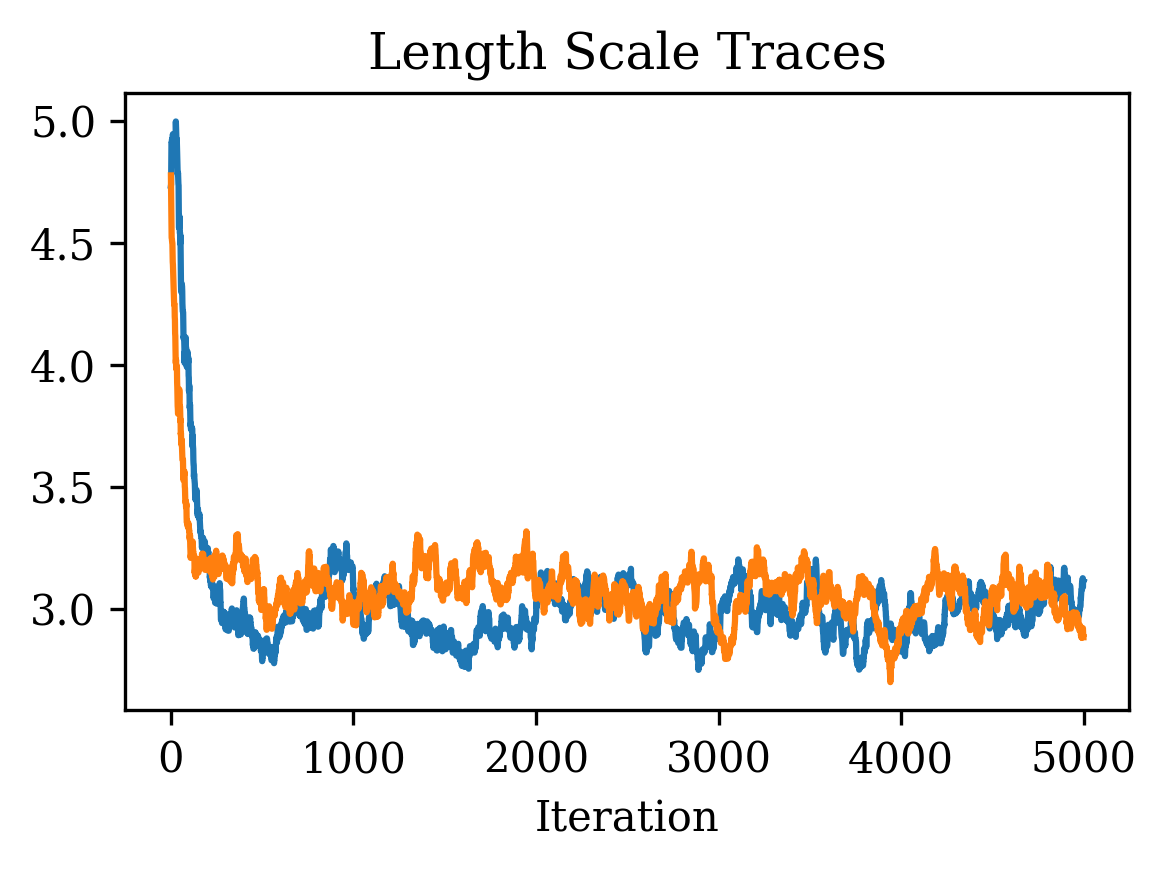

In [29]:
fig = plt.figure(figsize=(4, 3), dpi=300)
for j in range(2):
    plt.plot(theta_sample[:, j])
plt.title('Length Scale Traces')
plt.xlabel('Iteration')
fig.tight_layout()
fig.savefig('theta_traces.png')
plt.show()

In [64]:
burn = 1000
thin = 10

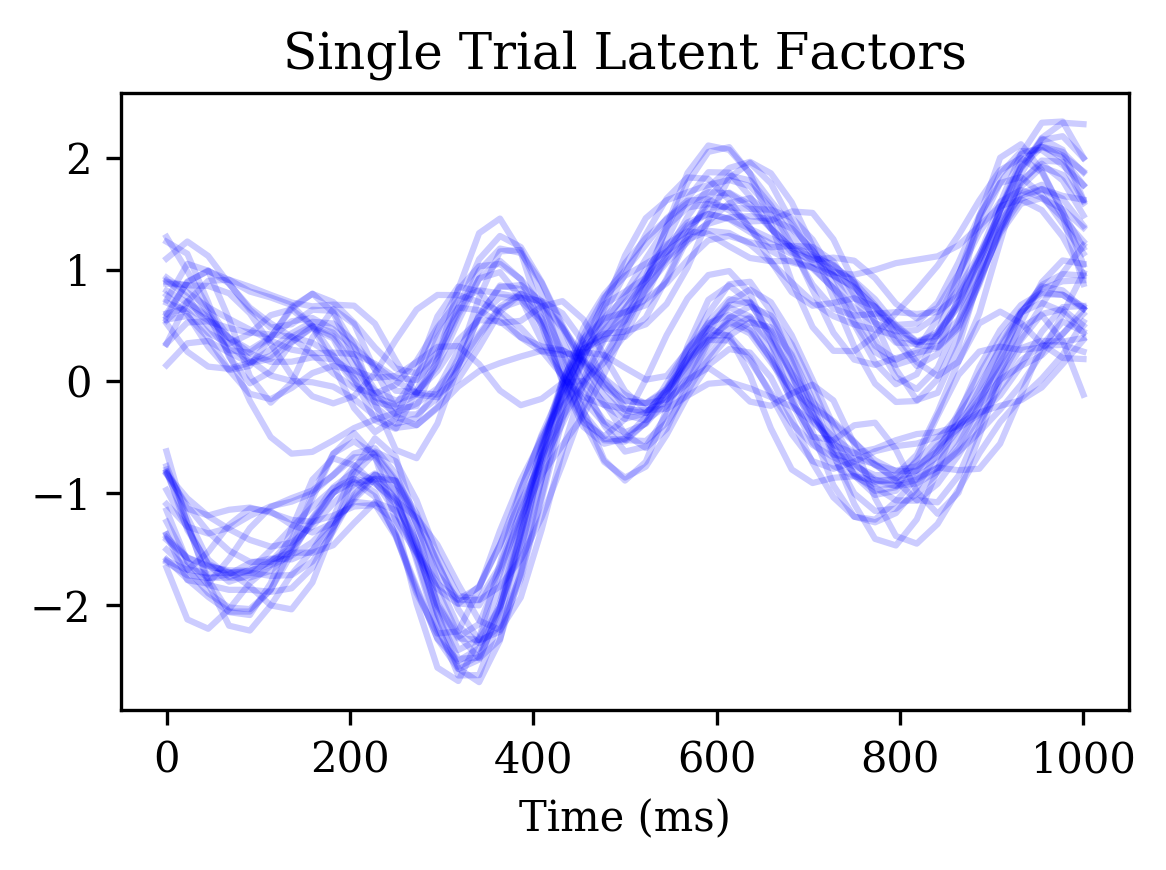

In [65]:
fig = plt.figure(figsize=(4, 3), dpi=300)
x = np.linspace(0, 1000, 45)
for i in range(20):
    plt.plot(x, F_sample[i * thin + burn, :45, 0], color='blue', alpha=0.2)
    plt.plot(x, F_sample[i * thin + burn, :45, 1], color='blue', alpha=0.2)
plt.title('Single Trial Latent Factors')
plt.xlabel('Time (ms)')
fig.tight_layout()
plt.savefig('trial.png')
plt.show()

In [66]:
factor1_median_odor_B = np.zeros((100, 45))
factor2_median_odor_B = np.zeros((100, 45))
factor1_median_odor_C = np.zeros((100, 45))
factor2_median_odor_C = np.zeros((100, 45))
for i in range(100):
    factor1_median_odor_B[i, :] = np.median(F_sample[i * thin + burn, :(20 * 45), 0].reshape((20, 45)), axis=0)
    factor2_median_odor_B[i, :] = np.median(F_sample[i * thin + burn, :(20 * 45), 1].reshape((20, 45)), axis=0)
    factor1_median_odor_C[i, :] = np.median(F_sample[i * thin + burn, (20 * 45):, 0].reshape((20, 45)), axis=0)
    factor2_median_odor_C[i, :] = np.median(F_sample[i * thin + burn, (20 * 45):, 1].reshape((20, 45)), axis=0)

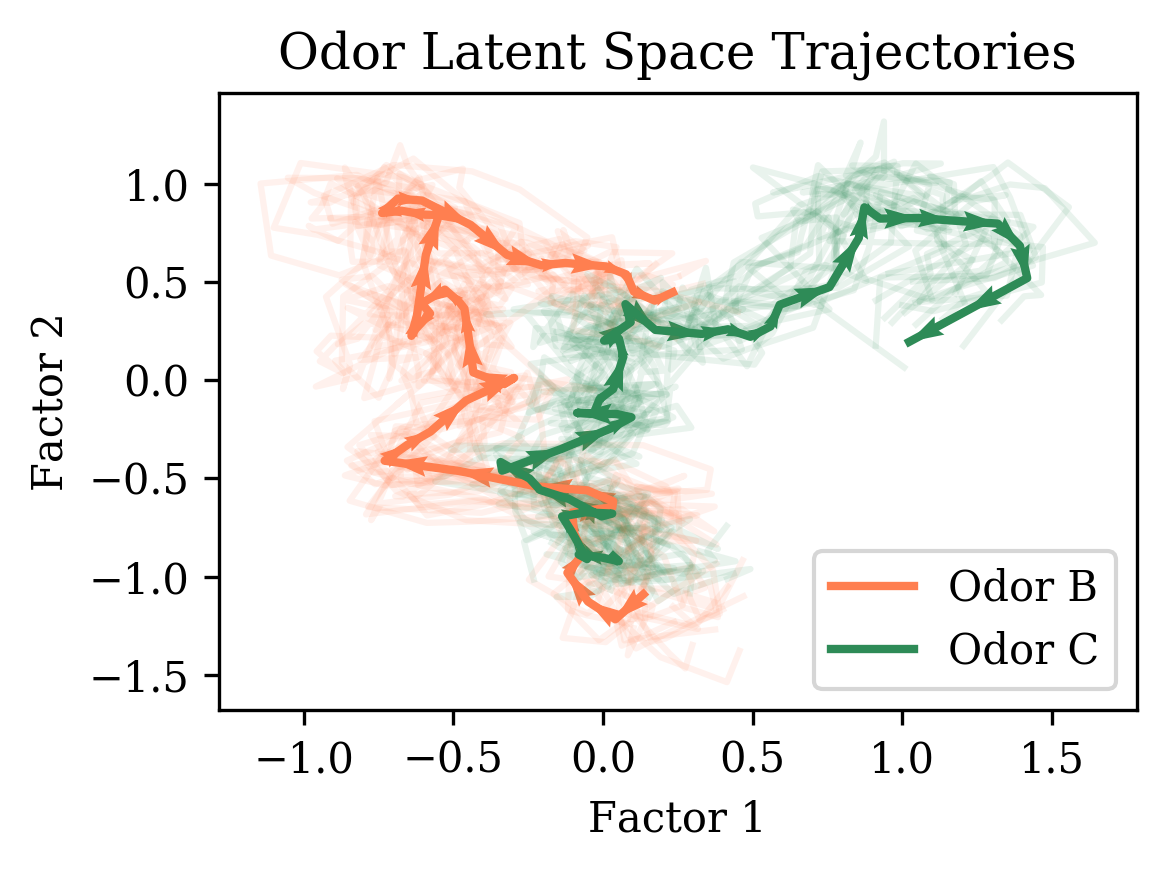

In [67]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)

for i in range(20):
    plt.plot(factor1_median_odor_B[i, :], factor2_median_odor_B[i, :], color='coral', alpha=0.1)
    plt.plot(factor1_median_odor_C[i, :], factor2_median_odor_C[i, :], color='seagreen', alpha=0.1)

plt.plot(np.median(factor1_median_odor_B, axis=0), np.median(factor2_median_odor_B, axis=0), 
         color='coral', lw=2, label='Odor B')

x1 = np.median(factor1_median_odor_B, axis=0)
y1 = np.median(factor2_median_odor_B, axis=0)
plt.quiver(x1[:-1], y1[:-1], x1[1:]-x1[:-1], y1[1:]-y1[:-1], scale_units='xy', angles='xy', scale=1, color='coral')

plt.plot(np.median(factor1_median_odor_C, axis=0), np.median(factor2_median_odor_C, axis=0), 
         color='seagreen', lw=2, label='Odor C')

x2 = np.median(factor1_median_odor_C, axis=0)
y2 = np.median(factor2_median_odor_C, axis=0)
plt.quiver(x2[:-1], y2[:-1], x2[1:]-x2[:-1], y2[1:]-y2[:-1], scale_units='xy', angles='xy', scale=1, color='seagreen')

#ax.text(-1, 0, 'Odor B', fontweight='bold')
#ax.text(0, 0, 'Odor C', fontweight='bold')

plt.title('Odor Latent Space Trajectories')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend()

fig.tight_layout()
plt.savefig('replay.png')
plt.show()